# **Solar Data Discovery** 

## **Sierraleone Data Profiling, Cleaning, and EDA**

In [2]:
# Import Required Libraries
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from scipy.stats import zscore

In [4]:
# Reading DataSets 
sierraleone_data = pd.read_csv("../data/sierraleone-bumbuna.csv", parse_dates=['Timestamp'])

### Data Profiling

In [5]:
# display the first 10 records
sierraleone_data.head(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04:00,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
5,2021-10-30 00:06:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.7,NaN
6,2021-10-30 00:07:00,-0.7,0.0,-0.8,0.0,0.0,22.0,99.4,0.1,0.7,0.2,240.4,0.0,1002,0,0.0,22.3,22.7,NaN
7,2021-10-30 00:08:00,-0.7,0.0,-0.8,0.0,0.0,22.0,99.5,0.2,0.7,0.4,233.5,1.6,1002,0,0.0,22.4,22.7,NaN
8,2021-10-30 00:09:00,-0.7,-0.1,-0.8,0.0,0.0,22.0,99.5,0.7,1.1,0.5,232.0,0.3,1002,0,0.0,22.4,22.7,NaN
9,2021-10-30 00:10:00,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.6,1.1,0.5,232.5,0.3,1002,0,0.0,22.4,22.7,NaN


In [6]:
# display the last 10 records 
sierraleone_data.tail(10)

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
525590,2022-10-29 23:51:00,-1.2,-0.1,-2.3,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.3,24.6,NaN
525591,2022-10-29 23:52:00,-1.2,-0.1,-2.3,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.3,24.6,NaN
525592,2022-10-29 23:53:00,-1.3,-0.1,-2.4,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.3,24.6,NaN
525593,2022-10-29 23:54:00,-1.4,-0.1,-2.5,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.2,24.6,NaN
525594,2022-10-29 23:55:00,-1.5,-0.1,-2.7,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.2,24.5,NaN
525595,2022-10-29 23:56:00,-1.6,-0.1,-2.9,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525596,2022-10-29 23:57:00,-1.7,-0.1,-3.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5,NaN
525597,2022-10-29 23:58:00,-1.7,-0.1,-3.1,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525598,2022-10-29 23:59:00,-1.7,-0.2,-3.3,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN
525599,2022-10-30 00:00:00,-1.7,-0.1,-3.4,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4,NaN


In [7]:
# display the shape of the data to get info about number features and instance 
print(f"Benin Solar data Information: ")
print(f"Instances: {sierraleone_data.shape[0]} records ")
print(f"Features:  {sierraleone_data.shape[1] } columns")

Benin Solar data Information: 
Instances: 525600 records 
Features:  19 columns


In [8]:
# Dataset information about type of each columns, size 
sierraleone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525600 entries, 0 to 525599
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Timestamp      525600 non-null  datetime64[ns]
 1   GHI            525600 non-null  float64       
 2   DNI            525600 non-null  float64       
 3   DHI            525600 non-null  float64       
 4   ModA           525600 non-null  float64       
 5   ModB           525600 non-null  float64       
 6   Tamb           525600 non-null  float64       
 7   RH             525600 non-null  float64       
 8   WS             525600 non-null  float64       
 9   WSgust         525600 non-null  float64       
 10  WSstdev        525600 non-null  float64       
 11  WD             525600 non-null  float64       
 12  WDstdev        525600 non-null  float64       
 13  BP             525600 non-null  int64         
 14  Cleaning       525600 non-null  int64         
 15  

In [9]:
# Getting number of unique values 
number_of_unique = pd.DataFrame({
    'columns': sierraleone_data.columns,
    '# of unique': sierraleone_data.nunique()
})
number_of_unique

,columns,# of unique
Timestamp,Timestamp,525600
GHI,GHI,8742
DNI,DNI,8205
DHI,DHI,7183
ModA,ModA,10188
ModB,ModB,8524
Tamb,Tamb,276
RH,RH,902
WS,WS,145
WSgust,WSgust,88


In [10]:
# getting number of missing values for all dataset
print("="*100)
print("Missing Values Detection ".center(150))
print("="*100, end="\n")
print(f"Total number of missing values in the Dataset: {sierraleone_data.isna().sum().sum()}")
print("="*100, end="\n")

# columns having missing values more than 5%

print(f"A Dataset Feature Having missing values more than 5 %".center(150))
print("="*100)
for col in sierraleone_data.columns:
    percent =(sierraleone_data[col].isna().sum()/sierraleone_data.shape[0]) * 100
    if  percent.round(2) >= 5:
        print(f"Missing Values of column {col}: -> {percent} %")
print("="*100,end="\n")




                                                              Missing Values Detection                                                                
Total number of missing values in the Dataset: 525600
                                                A Dataset Feature Having missing values more than 5 %                                                 
Missing Values of column Comments: -> 100.0 %


In [11]:
# Number of missing values for each features 
no_missing = pd.DataFrame({
    'columns':sierraleone_data.columns,
    '# missing': sierraleone_data.isna().sum(), 
    '% missing': sierraleone_data.isna().mean()*100
})
no_missing

,columns,# missing,% missing
Timestamp,Timestamp,0,0.0
GHI,GHI,0,0.0
DNI,DNI,0,0.0
DHI,DHI,0,0.0
ModA,ModA,0,0.0
ModB,ModB,0,0.0
Tamb,Tamb,0,0.0
RH,RH,0,0.0
WS,WS,0,0.0
WSgust,WSgust,0,0.0


In [16]:
# After getting missing number of missing values "comment" feature is dropped 
sierraleone_data.drop(['Comments'], axis=1, inplace=True)

In [17]:

# Number of Duplicated values 
print("="*100)
print("Duplicated Values".center(160))
print("="*100)
print(f"Number of Duplicated values in the dataset: {sierraleone_data.duplicated().sum()}".center(150))
print("="*100, end="\n")

                                                                       Duplicated Values                                                                        


                                                    Number of Duplicated values in the dataset: 0                                                     


In [21]:
# finding incorrect entries from the dataset     
negative_values = pd.DataFrame({
    'dtypes': sierraleone_data.dtypes,
    'num of -ve values': sierraleone_data.select_dtypes(include='number').lt(0).sum(),
    "% of -ve values": round(sierraleone_data.select_dtypes(include='number').lt(0).mean() *100, 2),
})

negative_values

,dtypes,num of -ve values,% of -ve values
BP,int64,0.0,0.00
Cleaning,int64,0.0,0.00
DHI,float64,263128.0,50.06
DNI,float64,266352.0,50.68
GHI,float64,261135.0,49.68
ModA,float64,0.0,0.00
ModB,float64,0.0,0.00
Precipitation,float64,0.0,0.00
RH,float64,0.0,0.00
TModA,float64,0.0,0.00


In [23]:
# The above tables shows feature DHI, DNI, and GHI having negative values
# The negative values are replaced with 0 
radiation_cols = ['GHI', 'DNI', 'DHI']
sierraleone_data[radiation_cols] = sierraleone_data[radiation_cols].clip(lower=0)

In [25]:
# Statistical Summery 
sierraleone_data.describe()

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
count,525600,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000,525600.000000
mean,2022-04-30 12:00:30.000000768,204.406778,116.523731,116.273677,206.643095,198.114691,26.319394,79.448857,1.146113,1.691606,0.363823,133.044668,7.172220,999.876469,0.000967,0.004806,32.504263,32.593091
min,2021-10-30 00:01:00,0.000000,0.000000,0.000000,0.000000,0.000000,12.300000,9.900000,0.000000,0.000000,0.000000,0.000000,0.000000,993.000000,0.000000,0.000000,10.700000,11.100000
25%,2022-01-29 06:00:45,0.000000,0.000000,0.000000,0.000000,0.000000,23.100000,68.700000,0.000000,0.000000,0.000000,0.000000,0.000000,999.000000,0.000000,0.000000,23.500000,23.800000
50%,2022-04-30 12:00:30,0.300000,0.000000,0.000000,3.600000,3.400000,25.300000,85.400000,0.800000,1.600000,0.400000,161.500000,6.200000,1000.000000,0.000000,0.000000,26.600000,26.900000
75%,2022-07-30 18:00:15,362.400000,107.000000,224.700000,359.500000,345.400000,29.400000,96.700000,2.000000,2.600000,0.600000,234.100000,12.000000,1001.000000,0.000000,0.000000,40.900000,41.300000
max,2022-10-30 00:00:00,1499.000000,946.000000,892.000000,1507.000000,1473.000000,39.900000,100.000000,19.200000,23.900000,4.100000,360.000000,98.400000,1006.000000,1.000000,2.400000,72.800000,70.400000
std,NaN,296.787520,218.573992,157.020868,300.896893,288.889073,4.398605,20.520775,1.239248,1.617053,0.295000,114.284792,7.535093,2.104419,0.031074,0.047556,12.434899,12.009161


- The above data profiling outputs describes:
  - The dataset one columns with missing values of all records
  -  There is no duplicated record in the dataset
  -  The Dataset contains 19 features and 525600 records
  -  The Dataset contains `16 float type` columns, `2 int type features` and `1 date and time feature`
  -  Dataset has one features with complete missing values. feature is called `comments` and all other features have no missing values 
  -  The data set contains incorrect feature inputs for `GHI, DNI anf DHI features`   

In [ ]:
# checking statistical summary of the dataset for only selected features
sierraleone_data[['GHI', 'DNI', 'DHI']].describe() 

,GHI,DNI,DHI
count,525600.000000,525600.000000,525600.000000
mean,196.290223,84.550127,110.795505
std,286.275178,171.068787,149.928665
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.300000,0.000000,0.000000
75%,349.300000,48.800000,217.900000
max,1057.000000,652.500000,562.500000


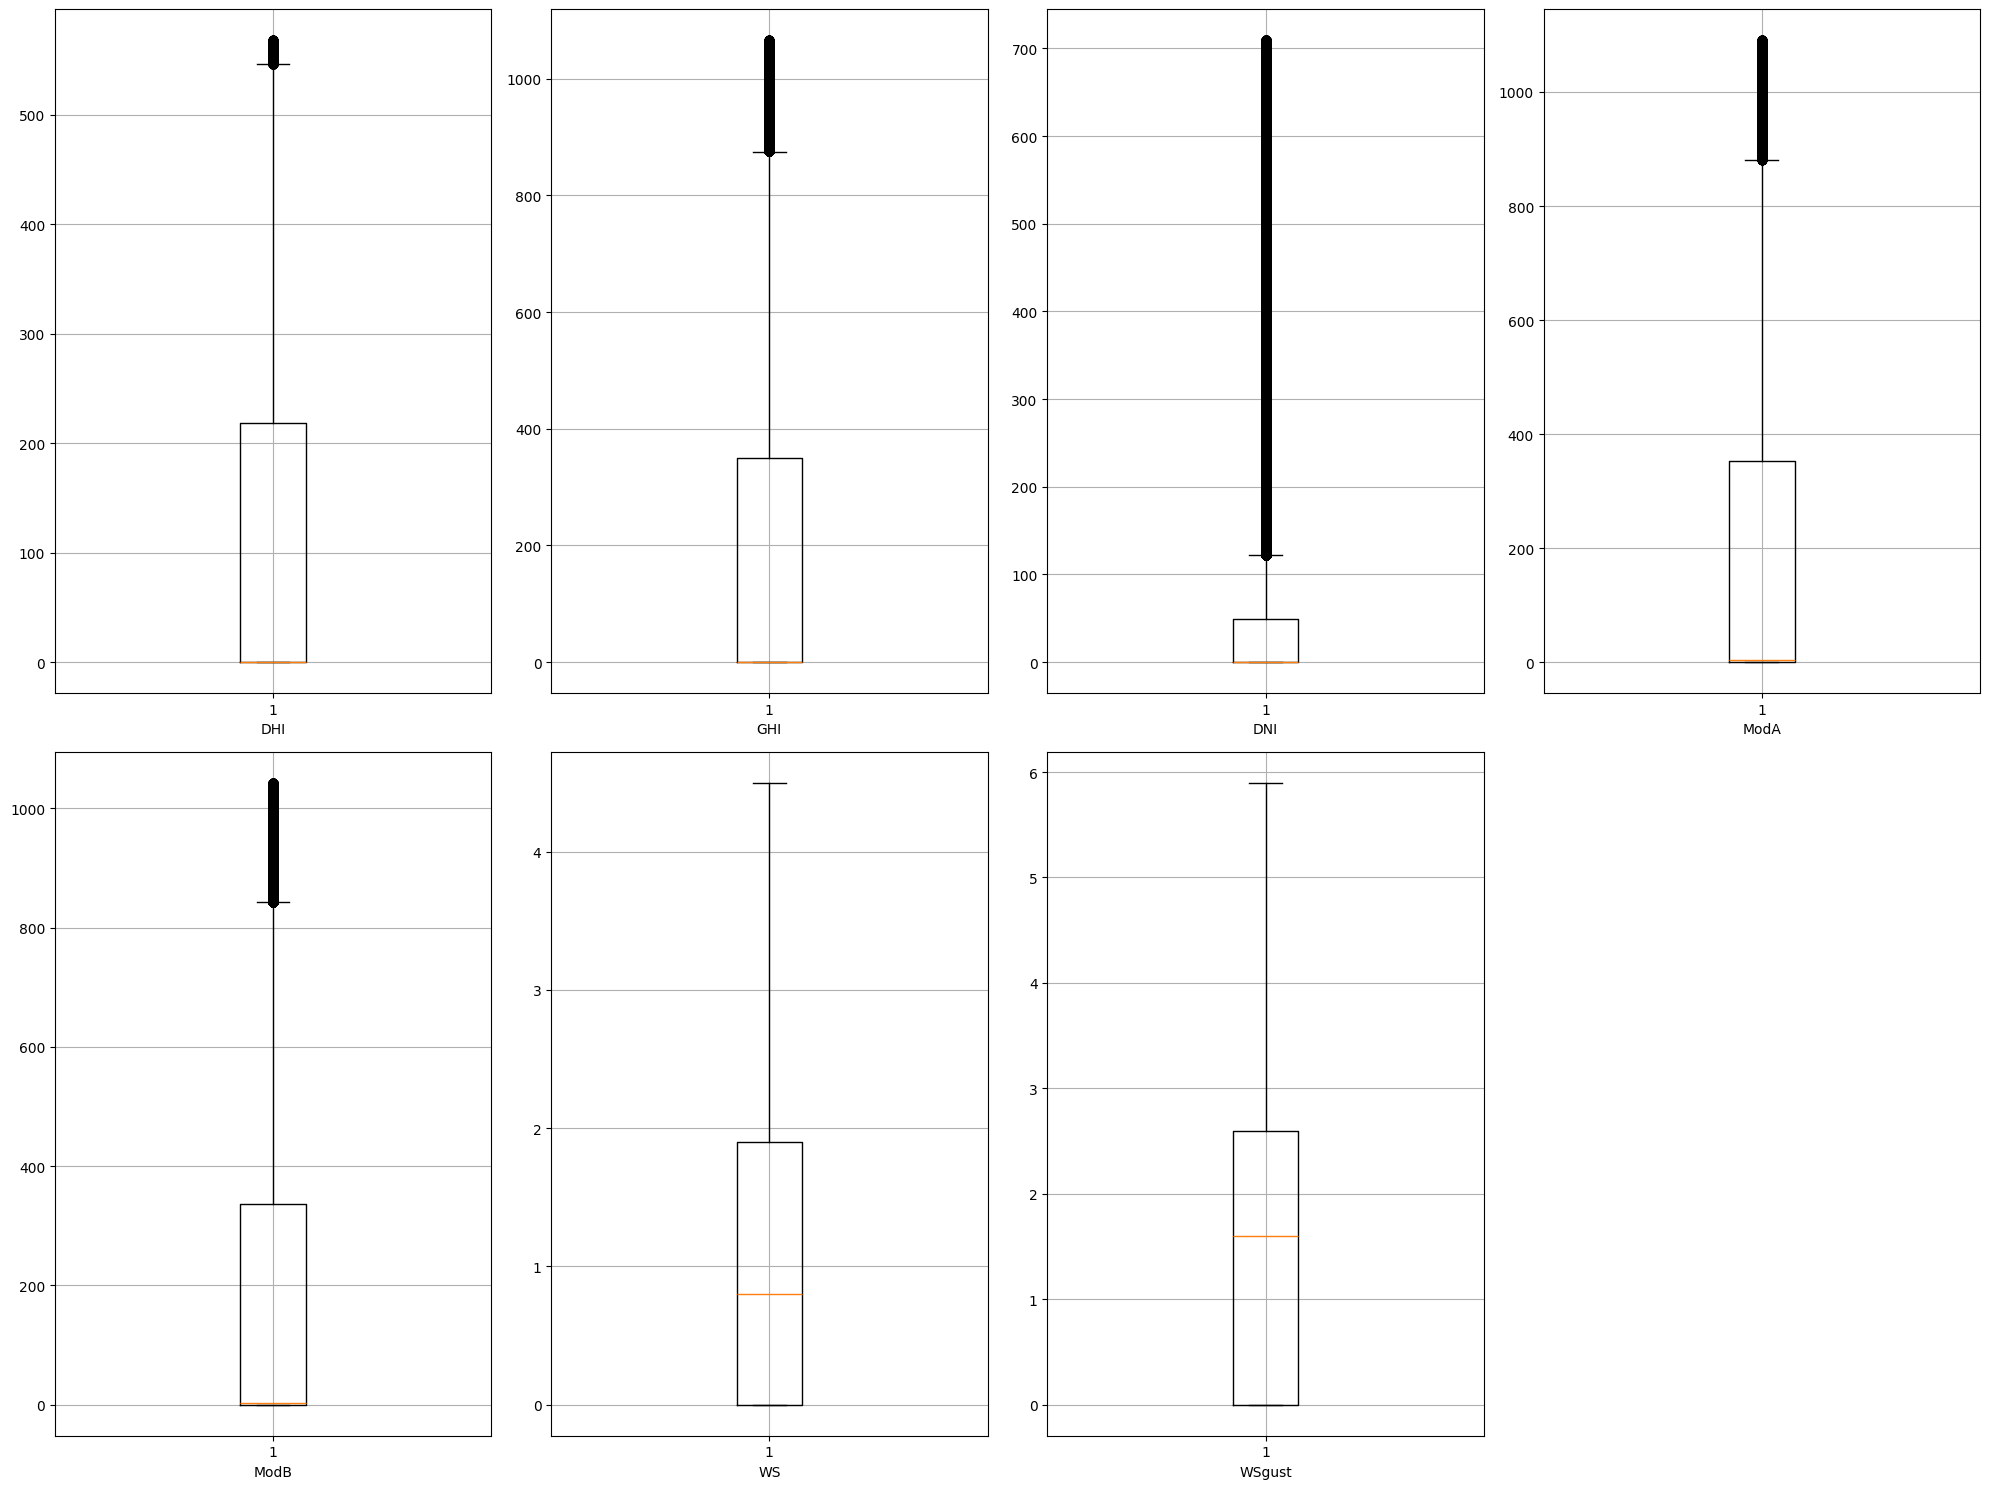

In [42]:
# checking for outliers for Modb, and ModA, WS, WSgust using boxplot
plt.figure(figsize=(20, 15))
for i, col in enumerate(cols, start = 1):
    plt.subplot(2,4,i)
    plt.boxplot(sierraleone_data[col])
    plt.xlabel(col)
    plt.grid(True)
plt.tight_layout()
plt.show()
    

In [28]:
# Finding Outlier Using interquartile Range (IQR) method for the following features
# GHI, DNI, DHI, ModA, ModB, WS, WSgust

column = ['GHI', 'DNI', 'DHI', 'ModA','ModB','WS', 'WSgust']

def IQR_outlier(columns):
    quantile1 = columns.quantile(0.25)
    quantile3 = columns.quantile(0.75)
    iqr = quantile3 - quantile1
    lowerbound = quantile1 - 1.5 * iqr 
    upperbound = quantile3 + 1.5 * iqr
    
    return (columns <lowerbound) | (columns>upperbound)

outlier = IQR_outlier(sierraleone_data[column])

outlier = pd.DataFrame({
    'column':column,
    '# of outlier': IQR_outlier(sierraleone_data[column]).sum(),
    '% of Outlier': round(IQR_outlier(sierraleone_data[column]).mean() * 100,2),
})

outlier

,column,# of outlier,% of Outlier
GHI,GHI,16684,3.17
DNI,DNI,101770,19.36
DHI,DHI,4842,0.92
ModA,ModA,21017,4.00
ModB,ModB,20613,3.92
WS,WS,3169,0.60
WSgust,WSgust,3665,0.70


In [29]:
# checking for outliers using zscore
def z_score_outlier(col):
    outlier = {}
    for co in col:    
            zscore1 = np.abs(zscore(sierraleone_data[co]))
            outlier[co]= zscore1 > 3 
    return outlier
outlier_z_score = z_score_outlier(['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust'])

cols = ['DHI', 'GHI', 'DNI', 'ModA','ModB','WS', 'WSgust']
z_score_Outlier = pd.DataFrame({
    'column': cols,
    '# of outlier': [outlier.sum() for outlier in outlier_z_score.values()],
    '% of Outlier':[round(outlier.mean() * 100, 2) for outlier in outlier_z_score.values()]
})
z_score_Outlier

,column,# of outlier,% of Outlier
0,DHI,3202,0.61
1,GHI,2574,0.49
2,DNI,7594,1.44
3,ModA,1604,0.31
4,ModB,2041,0.39
5,WS,3967,0.75
6,WSgust,3665,0.70


In [31]:
# Replace outliers with median
for col in cols:
    median_value = sierraleone_data[col].median()
    sierraleone_data.loc[outlier_z_score[col], col] = median_value

# Summary DataFrame
summary = pd.DataFrame({
    'column': cols,
    '# of Outliers': [outlier.sum() for outlier in outlier_z_score.values()],
    '% of Outliers': [round(outlier.mean() * 100, 2) for outlier in outlier_z_score.values()]
})

print(summary)

   column  # of Outliers  % of Outliers
0     DHI           3202           0.61
1     GHI           2574           0.49
2     DNI           7594           1.44
3    ModA           1604           0.31
4    ModB           2041           0.39
5      WS           3967           0.75
6  WSgust           3665           0.70


In [45]:
sierraleone_data

,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB
0,2021-10-30 00:01:00,0.0,0.0,0.0,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
1,2021-10-30 00:02:00,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
2,2021-10-30 00:03:00,0.0,0.0,0.0,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
3,2021-10-30 00:04:00,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6
4,2021-10-30 00:05:00,0.0,0.0,0.0,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
525595,2022-10-29 23:56:00,0.0,0.0,0.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525596,2022-10-29 23:57:00,0.0,0.0,0.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,999,0,0.0,24.2,24.5
525597,2022-10-29 23:58:00,0.0,0.0,0.0,0.0,0.0,24.0,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4
525598,2022-10-29 23:59:00,0.0,0.0,0.0,0.0,0.0,23.9,100.0,0.0,0.0,0.0,0.0,0.0,1000,0,0.0,24.1,24.4
